# Selective Classification Can Magnify Disparities Across Groups

#### [Jones, Sagawa, Koh, Kumar, & Liang (2021)](https://arxiv.org/pdf/2010.14134.pdf)

#### AM207: Advanced Scientific Computing: Stochastic Methods for Data Analysis, Inference, and Optimization

#### Team: Jamelle Watson-Daniels, Shirley Wang, Bridger Ruyle, Paul Tembo 

## 1. Problem Statement 
#### What is the problem the paper aims to solve?

Selective classification is a common approach within the machine learning field and refers to model absentions in cases of high uncertainty. By making predictions only when the model is highly confident in the outcome (for example, $p(y | x) > 0.5 + \tau$ for binary classifiers where $\tau$ is a threshold chosen by the model user), the model can improve average and out-of-distribution accuracies. This method may be particularly desirable in situations for which errors are costly, such as healthcare. In these cases, when a model is uncertain, decision-making can be deferred to a human expert (e.g., physician). Selective classification also has nice properties, such as improving average and out-of-distribution accuracies. In this paper, the authors demonstrate that this phenomenon is theoretically guaranteed for models with confidence distributions that are left-log concave and right skewed (i.e. skewed towards correct predictions) and that accurately predict the outcome $>50\%$ of the time.

However, in this paper, the authors also report a cautionary finding, such that selective classification can *magnify* existing disparities between groups in a population. Specifically, they report that for models which do not accurately predict the outcome $>50\%$ of the time, or for subgroups in larger models whose outcomes are poorly predicted, selective classification can *decrease* predictive accuracy. This phenomenon is “an insidious failure mode” because selective classification will increasingly make wrong predictions with greater confidence, particularly for groups with poor accuracy at full coverage, thus magnifying between-group disparities. Even for subgroups that are accurately predicted $>50\%$ of the time, selective classification improves accuracy for these groups at a slower rate compared to the overall model.

## 2. Context, Existing Work, and Contribution
#### Why is this problem important? What has been done in the literature, and what gap does the paper fill?

Selective classification seems to be a natural and logical approach for real-life, risk-adverse applications. For instance, in the healthcare field, consider a suicide prediction model that aims to classify patients at high or low risk for attempting suicide in the next week. These types of models are highly desirable in clinical psychiatry settings (e.g., emergency departments, inpatient psychiatric units), and it is crucial to help healthcare providers make decisions about whether to discharge someone from the hospital or keep them in for longer. In this case, if a model is uncertain about a prediction, it would be better for the model to abstain and defer decision-making to a healthcare professional (e.g., therapist, psychiatrist). 

However, if selective classification can exacerbate inter-group disparities in model performance, this raises serious concerns for equity. Groups that are already underserved by our existing systems may be further disadvantaged and be at highest risk for harm by an incorrect prediction. For instance, racial and gender minorities are already underrepresented in healthcare datasets and have lower accuracies than the model average. Model bias and group disparities are major issues in these fields, and if selective classification has the potential for *exacerbating* these disparities, it is crucial to obtain a better understanding of (1) when these disparities might be exacerbated and (2) potential solutions.

To date, existing work has demonstrated that models can latch onto spurious correlations in medical images (e.g., chest x-ray) and fail to appropriately detect illness for patients who may be the most at-risk (Oakden-Rayner, 2020). However, little is known about how such spurious correlations may interact with selective classification to magnify disparities, and the present paper (Jones et al., 2021) investigates this problem on five datasets that are known to develop spurious correlations during training. 

## 3. Technical Content
#### What are the high-level ideas and relevant technical details?

In this paper, Jones and colleagues (2021) demonstrate that selective classification can magnify group disparities across five independent datasets that tend to develop spurious correlations during model training. In selective classification, a model abstains from making a prediction when its confidence $\hat{c}$ is greater than or equal to some threshold $\tau$, where confidence in predicting a given class $\hat{c}(x)$ is given by: 

$$\hat{c}(x) = \frac{1}{2} \log \Big( \frac{\hat{p}(\hat{y}(x) | x)}{1 - \hat{p}(\hat{y}(x) | x)} \Big)$$

As shown in **Figure 1**, for a selective classifier, the margin distributions (on the left) and accuracy-coverage curves (on the right) show a discrepancy between the average and worst group performance.

<img src = 'figs/fig1.png' style = "width: 700px;">

**Figure 1**. Left plot: given a threshold $\tau$, a selective classifier makes incorrect classifications when predictions $\hat{y}(x) \leq -\tau$, abstains from making a prediction when $-\tau < \hat{y}(x) < \tau$, and makes a correct classification when $\hat{y}(x) \geq \tau$. Right plot: While average accuracy from a selective classifier *increases* as more abstensions are made (i.e., average coverage/proportion of predicted points goes down), accuracy for the worst group *decreases*. Likewise, while average accuracy from a selective classifier *decreases* as fewer abstensions are made, accuracy for the worst group *increases*.

## 4. Experiments 
#### What types of experiments were performed, and do results prove the claims?

The authors demonstrate the above effect across five datasets, including image and text datasets, as shown in **Figure 2**. From these images, we can see that the margin distributions tend to be shifted towards the left (i.e., less accurate predictions) for the worst group compared to the average. In other words, the selective classifier often confidently predicts incorrect labels for the worst group. In addition, the accuracy-coverage curves show that as more abstensions are made, the average accuracy tends to increase while the worst group accuracy tends to decrease.

<img src = 'figs/fig2.png' style = "width: 700px;">

This effect is perhaps most apparent for the `CelebA` dataset, which is a large image database of celebrities (Liu et al., 2015). In this case, the prediction task was to classify the hair color of celebrities (blond vs. non-blond hair), with the spurious attribute of gender, such that women were more likely to be blond. In this case, blond males were the "underrepresented" group in the dataset, experiencing the worst performance, due to class imbalance (representing only 8.5% of training examples) and the spurious correlation between gender and hair color. 

In addition to these five experiments, in the present paper, Jones and colleagues (2021) discuss a solution to mitigate this problem by training the model using group distributionally robust optimization (DRO), which minimizes the *worst-group training loss* instead of the *overall* training loss for the dataset. Using this method, the confidence distribution of the worst-group more closely matches the distribution of the overall model. Thus, DRO models allow selective classification to affect both subgroups and the overall data equally. Of note, this approach requires that group labels are known during training (which may not always be the case in real-world application), though the labels can be removed for testing/deployment.


## 5. Our Methods - Replication and Extension 
#### How did we reproduce this paper's results, and what methods did we use? 

Jones and colleagues (2021) report that selective classification can magnify existing group disparities particularly in the presence of spurious correlations demonstrating this behavior across five datasets. In this project, we examine the following question: what are the dataset characteristics the lead to the increased disparities? Because the paper notes the importance of spurious correlations, we bring our attention to varying levels of correlations. We consider the image classification setting and generate synthetic datasets with varying degrees of spurious correlations. Then, we analyze the margin distributions and the selective accuracy of both the overall dataset and the worst group. Ultimately, we compare these results for the varying degrees of spurious correlations to make conclusions about the importance of the dataset characteristics in obtaining the specific magnifying group disparities result.

## 5a. Generating Synthetic Data

The paper claims to consider datasets known to have spurious correlations. The image datasets used in the paper contain over 100,000 examples and are not practical for use in this project analysis. Therefore, we generate synthetic datasets derived from the MNIST dataset where we add spurious correlations of varying degrees. 

Specifically, we download the `mnist` dataset and select two numbers for the binary classification task. We introduce spurious attributes as filled in pixels added to the empty space on the upper left hand corner of a given image. These filled pixels can be thought of as boxes that will be correlated with one of the labels. In essence, a given label might then be correlated not only with the original written digit in the `mnist` dataset, but also with whether or not the image contains this added black box. In the training dataset, we add these black boxes to a percentage of the images with each label $Y \in {0,1}$. To mimic the characteristics of the `celebA` dataset used in the paper, we keep the percentage of images with $Y = 1$ label constant at 8.5%. This means that we only add black boxes to 8.5% of training examples with the label $Y = 1$. We generate four datasets with different proportions of examples with the $Y = 0$ label altered: 30%, 50%, 70% and 90%. This results in spurious correlations between the added black box and the $Y = 0$ label.

We consider the task of classifying digits 1 and 7. And we alter the data such that the digit 1 is spuriously correlated with the added black box. Concretely, inputs are `mnist` digits, labels are digit number Y = {1, 7}, and suprious attributes are black boxes, A = {present, absent}, with added black boxes associated with digit 7. Of the four groups, digit 1 with black boxes are the smallest group. 

In [1]:
from autograd import grad
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

import seaborn as sns

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True, as_frame = False)

In [3]:
# Pick out two classes of digits: 1, 7 and take a subset of samples 
X_subset = X[((y == '1') | (y == '7'))]
y_subset = y[((y == '1') | (y == '7'))]

# Encode the label '1' with y = 1, and the label '7' with y = 0
y_subset[y_subset == '1'] = 1
y_subset[y_subset == '7'] = 0
y_subset = y_subset.astype(int)

# Split into training and testing sets
# Following celebA: 80% training, 10% val, 10% test 
rand_seed = 123
X_train, X_test_tot, y_train, y_test_tot = train_test_split(X_subset, y_subset, test_size = 0.2, random_state = rand_seed) # split out train
X_val, X_test, y_val, y_test = train_test_split(X_test_tot, y_test_tot, test_size = 0.5, random_state = rand_seed) # split out validation set

# save y_train, y_val, y_test labels in data folder
np.savetxt('data/y_train.csv', y_train, delimiter = ',')
np.savetxt('data/y_val.csv', y_val, delimiter = ',')
np.savetxt('data/y_test.csv', y_test, delimiter = ',')

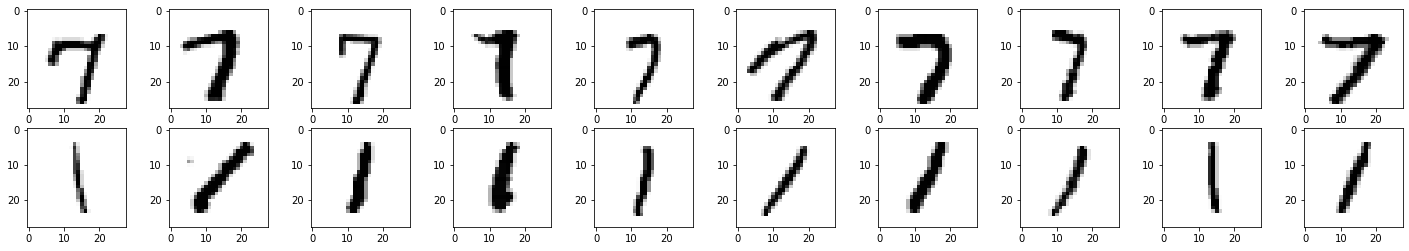

In [4]:
# Visualize some samples from the training dataset 
fig, ax = plt.subplots(2, 10, figsize = (25, 4))
for i in range(10):
    ax[0, i].imshow(X_train[y_train == 0][i].reshape((28, 28)), cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax[1, i].imshow(X_train[y_train == 1][i].reshape((28, 28)), cmap = plt.cm.gray_r, interpolation = 'nearest')

This plot shows some example (unaltered) images from the `mnist` dataset. Specifically, our task is to classify digit 1 vs. 7. The following function alters specific proportions of these images in order to introduce spurious features (i.e., a black box on the upper left-hand corner of an image that appears more often on digit 7 as compared to digit 1).

In [5]:
# function to add a grey rectangular box to top left-hand corner of digit

def add_spurious_ft(x_array, y_array, perc_spurious_1, perc_spurious_2):
    '''
    this function takes in x and y arrays, adds spurious features to some images, and returns 
    the altered image array, along with indices of the images that were altered. spurious features
    include a grey box on the upper lefthand side of the image.
    
    x_array: array of shape (n_images, 784)
    y_array: array of shape (n_images, )
    perc_spurious_1: percent of digit 1 images to add spurious features to
    perc_spurious_2: percent of digit 1 images to add spurious features to

    returns: 
        altered image array
        indices of altered images (0 = not altered, 1 = altered)
    '''
    
    indices_1 = np.asarray(np.where(y_train == 1)).reshape(-1) # indices where digit = 1 
    indices_2 = np.asarray(np.where(y_train == 0)).reshape(-1) # indices where digit = 2 
    
    num_digit_1 = len(indices_1) # number of digit 1 images 
    num_digit_2 = len(indices_2) # number of digit 2 images 

    num_alter_1 = int(perc_spurious_1 * num_digit_1) # number of digit 1 images to alter
    num_alter_2 = int(perc_spurious_2 * num_digit_2) # number of digit 2 images to alter
    
    np.random.seed(123)
    rand_indices_1 = np.random.choice(len(indices_1), size = num_alter_1, replace = False) 
    rand_indices_2 = np.random.choice(len(indices_2), size = num_alter_2, replace = False) 
    
    grey_boxes = np.r_[0:15, 28:43, 56:71]
    altered_imgs = x_array
    
    image_altered = []
    
    for i in range(len(altered_imgs)):
        
        # alter digit 7 images 
        if y_train[i] == 0:
            if i in rand_indices_2:
                altered_imgs[i][grey_boxes] = np.array([256] * len(grey_boxes))
                image_altered.append(1) # 1 = altered 
            else:
                image_altered.append(0) # 0 = not altered
        
        # alter digit 1 images 
        elif y_train[i] == 1:
            if i in rand_indices_1:
                altered_imgs[i][grey_boxes] = np.array([256] * len(grey_boxes))
                image_altered.append(1)
            else: 
                image_altered.append(0)
    
    return altered_imgs, np.array(image_altered)

In [6]:
# test to see if the function works 
test_altered_imgs, test_altered_indices = add_spurious_ft(X_train, y_train, 0.085, 0.7)

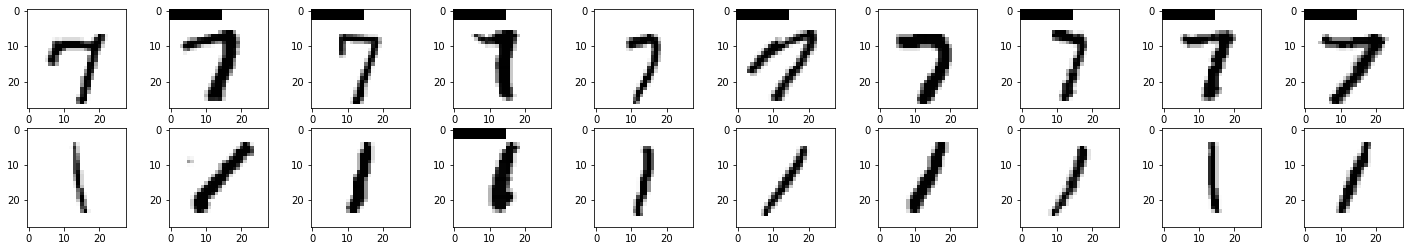

In [7]:
# Visualize some samples from the altered training dataset. more 7's with spurious features than 1's. seems to work! 
fig, ax = plt.subplots(2, 10, figsize = (25, 4))
for i in range(10):
    ax[0, i].imshow(test_altered_imgs[y_train == 0][i].reshape((28, 28)), cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax[1, i].imshow(test_altered_imgs[y_train == 1][i].reshape((28, 28)), cmap = plt.cm.gray_r, interpolation = 'nearest')

These images are now altered to include a spurious feature, such that the presence of the black box is "spuriously correlated" with digit 7 (just as female gender was spuriously correlated with blond hair in the `CelebA` dataset used in the paper by Jones et al., 2021). 

To explore the impact of the strength of this spurious correlation, we now use the above function to generate 4 sets of image datasets (each with a training, validation, and test set) with different percent of spurious features present in digit 7 (while holding the percept of spurious features in digit 1 constant at 8.5; following the `CelebA` dataset).

`X_train_9`, `X_val_9`, `X_test_9`: 90% spurious features in digit 7; 8.5% spurious features in digit 1.

`X_train_7`, `X_val_7`, `X_test_7`: 70% spurious features in digit 7; 8.5% spurious features in digit 1.

`X_train_5`, `X_val_5`, `X_test_5`: 50% spurious features in digit 7; 8.5% spurious features in digit 1.

`X_train_3`, `X_val_3`, `X_test_3`: 30% spurious features in digit 7; 8.5% spurious features in digit 1.

In [8]:
pct_label_0 = 0.085
# 90% spurious in digit 7 
X_train_9, X_train_9_altindices = add_spurious_ft(X_train, y_train, pct_label_0, 0.9)
X_val_9, X_val_9_altindices = add_spurious_ft(X_val, y_val, pct_label_0, 0.9)
X_test_9, X_test_9_altindices = add_spurious_ft(X_test, y_test, pct_label_0, 0.9)

# 70% spurious in digit 7 
X_train_7, X_train_7_altindices = add_spurious_ft(X_train, y_train, pct_label_0, 0.7)
X_val_7, X_val_7_altindices = add_spurious_ft(X_val, y_val, pct_label_0, 0.7)
X_test_7, X_test_7_altindices = add_spurious_ft(X_test, y_test, pct_label_0, 0.7)

# 50% spurious in digit 7
X_train_5, X_train_5_altindices = add_spurious_ft(X_train, y_train, pct_label_0, 0.5)
X_val_5, X_val_5_altindices = add_spurious_ft(X_val, y_val, pct_label_0, 0.5)
X_test_5, X_test_5_altindices = add_spurious_ft(X_test, y_test, pct_label_0, 0.5)

# 30% spurious in digit7
X_train_3, X_train_3_altindices = add_spurious_ft(X_train, y_train, pct_label_0, 0.3)
X_val_3, X_val_3_altindices = add_spurious_ft(X_val, y_val, pct_label_0, 0.3)
X_test_3, X_test_3_altindices = add_spurious_ft(X_test, y_test, pct_label_0, 0.3)

In [9]:
# save altered indices labels 

np.savetxt('data/altered_index_train_9.csv', X_train_9_altindices, delimiter = ',')
np.savetxt('data/altered_index_val_9.csv', X_val_9_altindices, delimiter = ',')
np.savetxt('data/altered_index_test_9.csv', X_test_9_altindices, delimiter = ',')

np.savetxt('data/altered_index_train_7.csv', X_train_7_altindices, delimiter = ',')
np.savetxt('data/altered_index_val_7.csv', X_val_7_altindices, delimiter = ',')
np.savetxt('data/altered_index_test_7.csv', X_test_7_altindices, delimiter = ',')

np.savetxt('data/altered_index_train_5.csv', X_train_5_altindices, delimiter = ',')
np.savetxt('data/altered_index_val_5.csv', X_val_5_altindices, delimiter = ',')
np.savetxt('data/altered_index_test_5.csv', X_test_5_altindices, delimiter = ',')

np.savetxt('data/altered_index_train_3.csv', X_train_3_altindices, delimiter = ',')
np.savetxt('data/altered_index_val_3.csv', X_val_3_altindices, delimiter = ',')
np.savetxt('data/altered_index_test_3.csv', X_test_3_altindices, delimiter = ',')

## 5b. Data Processing and Modeling

We develop a neural network to classify the images in the four datasets produced. Designing the architecture of the model took time as we tried to replicate the trends of the paper. Once we train a model for each of the four datasets, we investigate the margin distributions and the accuracy coverage curve to compare our results with those in the paper.

First, to prepare the synthetic data for a ResNet NN, we perform some data processing.

In [10]:
## Reshape the datasets
# 90% spurious in digit 2 reshaped
X_train_9_reshaped = X_train_9.reshape((X_train_9.shape[0], 28, 28))
X_val_9_reshaped = X_val_9.reshape((X_val_9.shape[0], 28, 28))
X_test_9_reshaped = X_test_9.reshape((X_test_9.shape[0], 28, 28))

# # 70% spurious in digit 2 reshaped
X_train_7_reshaped = X_train_7.reshape((X_train_7.shape[0], 28, 28))
X_val_7_reshaped = X_val_7.reshape((X_val_7.shape[0], 28, 28))
X_test_7_reshaped = X_test_7.reshape((X_test_7.shape[0], 28, 28))


# # 50% spurious in digit 2 reshaped
X_train_5_reshaped = X_train_5.reshape((X_train_5.shape[0], 28, 28))
X_val_5_reshaped = X_val_5.reshape((X_val_5.shape[0], 28, 28))
X_test_5_reshaped = X_test_5.reshape((X_test_5.shape[0], 28, 28))


# # 30% spurious in digit 2 reshaped
X_train_3_reshaped = X_train_3.reshape((X_train_3.shape[0], 28, 28))
X_val_3_reshaped = X_val_3.reshape((X_val_3.shape[0], 28, 28))
X_test_3_reshaped = X_test_3.reshape((X_test_3.shape[0], 28, 28))

# # # Exapand the datasets
# expand new axis, channel axis 
x_train_x9 = np.expand_dims(X_train_9_reshaped, axis = -1)
x_test_x9 = np.expand_dims(X_test_9_reshaped, axis = -1)
x_val_x9 = np.expand_dims(X_val_9_reshaped, axis = -1)

x_train_x7 = np.expand_dims(X_train_7_reshaped, axis = -1)
x_test_x7 = np.expand_dims(X_test_7_reshaped, axis = -1)
x_val_x7 = np.expand_dims(X_val_7_reshaped, axis = -1)

x_train_x5 = np.expand_dims(X_train_5_reshaped, axis = -1)
x_test_x5 = np.expand_dims(X_test_5_reshaped, axis = -1)
x_val_x5 = np.expand_dims(X_val_5_reshaped, axis = -1)

x_train_x3 = np.expand_dims(X_train_3_reshaped, axis = -1)
x_test_x3 = np.expand_dims(X_test_3_reshaped, axis = -1)
x_val_x3 = np.expand_dims(X_val_3_reshaped, axis = -1)

# We need 3 channel (instead of 1)
channel_num = 3
x_train_x9 = np.repeat(x_train_x9, channel_num, axis = -1)
x_test_x9 = np.repeat(x_test_x9, channel_num, axis = -1)
x_val_x9 = np.repeat(x_val_x9, channel_num, axis = -1)

x_train_x7 = np.repeat(x_train_x7, channel_num, axis = -1)
x_test_x7 = np.repeat(x_test_x7, channel_num, axis = -1)
x_val_x7 = np.repeat(x_val_x7, channel_num, axis = -1)

x_train_x5 = np.repeat(x_train_x5, channel_num, axis = -1)
x_test_x5 = np.repeat(x_test_x5, channel_num, axis = -1)
x_val_x5 = np.repeat(x_val_x5, channel_num, axis = -1)

x_train_x3 = np.repeat(x_train_x3, channel_num, axis = -1)
x_test_x3 = np.repeat(x_test_x3, channel_num, axis = -1)
x_val_x3 = np.repeat(x_val_x3, channel_num, axis = -1)

# normalize 
normalization = 255
x_train_x9 = x_train_x9.astype('float32') / normalization
x_test_x9 = x_test_x9.astype('float32') / normalization
x_val_x9 = x_val_x9.astype('float32') / normalization

x_train_x7 = x_train_x7.astype('float32') / normalization
x_test_x7 = x_test_x7.astype('float32') / normalization
x_val_x7 = x_val_x7.astype('float32') / normalization

x_train_x5 = x_train_x5.astype('float32') / normalization
x_test_x5 = x_test_x5.astype('float32') / normalization
x_val_x5 = x_val_x5.astype('float32') / normalization
x_train_x3 = x_train_x3.astype('float32') / normalization
x_test_x3 = x_test_x3.astype('float32') / normalization
x_val_x3 = x_val_x3.astype('float32') / normalization

# resize the input shape , i.e. old shape: 28, new shape: 32
input_shape = 32
x_train_x9 = tf.image.resize(x_train_x9, [input_shape, input_shape]) 
x_test_x9 = tf.image.resize(x_test_x9, [input_shape, input_shape]) 
x_val_x9 = tf.image.resize(x_val_x9, [input_shape, input_shape])  

x_train_x7 = tf.image.resize(x_train_x7, [input_shape, input_shape]) 
x_test_x7 = tf.image.resize(x_test_x7, [input_shape, input_shape]) 
x_val_x7 = tf.image.resize(x_val_x7, [input_shape, input_shape]) 

x_train_x5 = tf.image.resize(x_train_x5, [input_shape, input_shape]) 
x_test_x5 = tf.image.resize(x_test_x5, [input_shape, input_shape]) 
x_val_x5 = tf.image.resize(x_val_x5, [input_shape, input_shape])  

x_train_x3 = tf.image.resize(x_train_x3, [input_shape, input_shape]) 
x_test_x3 = tf.image.resize(x_test_x3, [input_shape, input_shape])  
x_val_x3 = tf.image.resize(x_val_x3, [input_shape, input_shape]) 

In [11]:
# define the number of epochs here. For testing, we can use 1?
num_epochs = 10

# To save time, we have saved the results of the following code in .csv files
# If you want to retrain the models, set the following boolean to True
train_all_models = False

In [12]:
def train_resnet_model(x_train, y_train, x_val, y_val, x_test):
    ''' This function loads the ResNet with preset weights, adds three layers, and fits the model.
    parameters
    ------
    
    returns
    ------
    history , predict : fitted model, predictions on train
    '''
    inputs = tf.keras.Input(shape = (input_shape, input_shape, 3))
    
    # Load ResNet with preset weights from "imagenet" training
    base_model = tf.keras.applications.ResNet50(
        input_tensor = inputs,
        include_top = False,
        weights = 'imagenet'
    )

    base_model.traninable = False
    
    # add additional layers
#         Add three layers at the end of ResNet:
#         A global average 2d pooling layer
#         A dropout layer
#         And a trainable binary classifier equivalent to the one that predicts spurious feature
    add_model = tf.keras.Sequential()
    add_model.add(base_model)
    add_model.add(tf.keras.layers.GlobalAveragePooling2D())
    add_model.add(tf.keras.layers.Dropout(0.2))
    add_model.add(tf.keras.layers.Dense(2, 
                        activation='softmax'))
    
    # instantiate model for prediction
    model = add_model
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    history = model.fit(x = x_train, y = y_train, validation_data = (x_val, y_val), epochs = num_epochs)

    predict = model.predict(x_test)
    
    return history, predict    

In [13]:
# train ResNet model with 90% spurious correlation
if (train_all_models == True):
    history_9, predict_9 = train_resnet_model(x_train = x_train_x9,
                                              y_train = y_train,
                                              x_val = x_val_x9,
                                              y_val = y_val, 
                                              x_test = x_test_x9)
    # re-save the prediction
    np.savetxt('data/RESNET_predict_9.csv', predict_9, delimiter = ',')
else:
    predict_9 = np.genfromtxt('data/RESNET_predict_9.csv', delimiter = ',')


In [14]:
if (train_all_models == True):
    # train Resnet model with 70% spurious correlation
    history_7, predict_7 = train_resnet_model(x_train = x_train_x7,
                                              y_train = y_train,
                                              x_val = x_val_x7,
                                              y_val = y_val, 
                                              x_test = x_test_x7)
    
    np.savetxt('data/RESNET_predict_7.csv', predict_7, delimiter = ',')
else:
    predict_7 = np.genfromtxt('data/RESNET_predict_7.csv', delimiter = ',')

In [15]:
if (train_all_models == True):
    # train Resnet model with 50% spurious correlation
    history_5, predict_5 = train_resnet_model(x_train = x_train_x5,
                                              y_train = y_train,
                                              x_val = x_val_x5,
                                              y_val = y_val, 
                                              x_test = x_test_x5)
    
    np.savetxt('data/RESNET_predict_5.csv', predict_5, delimiter = ',')
else:
    predict_5 = np.genfromtxt('data/RESNET_predict_5.csv', delimiter = ',')

In [16]:
if (train_all_models == True):
    # train Resnet model with 30% spurious correlation
    history_3, predict_3 = train_resnet_model(x_train = x_train_x3,
                                              y_train = y_train,
                                              x_val = x_val_x3,
                                              y_val = y_val, 
                                              x_test = x_test_x3)
    
    np.savetxt('data/RESNET_predict_3.csv', predict_3, delimiter = ',')
else:
    predict_3 = np.genfromtxt('data/RESNET_predict_3.csv', delimiter = ',')

As a comparison to the state-of-the-art ResNet models trained above, we also use Keras to train a simple 2-layer neural network for each of the spurious datasets (90%, 70%, 50%, 30%). These models can help us explore the impact of simple vs. complex models with transfer learning on the results. 

In [17]:
## Train keras model with 90% spurious correlation dataset
reg_model_9 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (input_shape, input_shape,3)), 
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)])

In [18]:
reg_model_9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 393,473
Trainable params: 393,473
Non-trainable params: 0
_________________________________________________________________


In [19]:
reg_model_9.compile(optimizer ='sgd',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# model 9 regular 2 layer rnn compile and fit
reg_model_9_history = reg_model_9.fit(x = x_train_x9,
                                      y = y_train,
                                      validation_data = (x_val_x9, y_val), 
                                      epochs = num_epochs)


predict_nn_9 = reg_model_9.predict(x_test_x9)

Epoch 1/10
380/380 [==============================] - 2s 4ms/step - loss: 0.0805 - accuracy: 0.9844 - val_loss: 0.0606 - val_accuracy: 0.9842
Epoch 2/10
380/380 [==============================] - 1s 3ms/step - loss: 0.0335 - accuracy: 0.9911 - val_loss: 0.0482 - val_accuracy: 0.9875
Epoch 3/10
380/380 [==============================] - 1s 3ms/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.0352 - val_accuracy: 0.9901
Epoch 4/10
380/380 [==============================] - 3s 7ms/step - loss: 0.0237 - accuracy: 0.9933 - val_loss: 0.0327 - val_accuracy: 0.9908
Epoch 5/10
380/380 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0293 - val_accuracy: 0.9927
Epoch 6/10
380/380 [==============================] - 2s 5ms/step - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.0257 - val_accuracy: 0.9927
Epoch 7/10
380/380 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.0239 - val_accuracy: 0.9934
Epoch 

In [20]:
np.savetxt('data/NN_predict_9.csv', predict_nn_9, delimiter = ',')

In [21]:
## Train keras model with 70% spurious correlation dataset
reg_model_7 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (input_shape, input_shape,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [22]:
reg_model_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 393,473
Trainable params: 393,473
Non-trainable params: 0
_________________________________________________________________


In [23]:
reg_model_7.compile(optimizer ='sgd',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# model 7 regular 2 layer rnn compile and fit
reg_model_7_history = reg_model_7.fit(x=x_train_x7,y=y_train, validation_data=(x_val_x7, y_val), epochs=10)


predict_nn_7 = reg_model_7.predict(x_test_x7)



Epoch 1/10
380/380 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9832 - val_loss: 0.0598 - val_accuracy: 0.9848
Epoch 2/10
380/380 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 0.9910 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 3/10
380/380 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.9925 - val_loss: 0.0347 - val_accuracy: 0.9888
Epoch 4/10
380/380 [==============================] - 2s 4ms/step - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0305 - val_accuracy: 0.9908
Epoch 5/10
380/380 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9938 - val_loss: 0.0262 - val_accuracy: 0.9914
Epoch 6/10
380/380 [==============================] - 2s 6ms/step - loss: 0.0198 - accuracy: 0.9941 - val_loss: 0.0273 - val_accuracy: 0.9914
Epoch 7/10
380/380 [==============================] - 2s 4ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.0250 - val_accuracy: 0.9934
Epoch 

In [24]:
np.savetxt('data/NN_predict_7.csv', predict_nn_7, delimiter = ',')

In [25]:
## Train keras model with 50% spurious correlation dataset
reg_model_5 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (input_shape, input_shape, 3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [26]:
reg_model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 393,473
Trainable params: 393,473
Non-trainable params: 0
_________________________________________________________________


In [27]:
reg_model_5.compile(optimizer ='sgd',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# model 5 regular 2 layer rnn compile and fit
reg_model_5_history = reg_model_5.fit(x=x_train_x5,y=y_train, validation_data=(x_val_x5, y_val), epochs=10)


predict_nn_5 = reg_model_5.predict(x_test_x5)

Epoch 1/10
380/380 [==============================] - 2s 4ms/step - loss: 0.0821 - accuracy: 0.9796 - val_loss: 0.0578 - val_accuracy: 0.9848
Epoch 2/10
380/380 [==============================] - 2s 5ms/step - loss: 0.0341 - accuracy: 0.9907 - val_loss: 0.0408 - val_accuracy: 0.9901
Epoch 3/10
380/380 [==============================] - 2s 5ms/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.0364 - val_accuracy: 0.9908
Epoch 4/10
380/380 [==============================] - 2s 4ms/step - loss: 0.0238 - accuracy: 0.9931 - val_loss: 0.0337 - val_accuracy: 0.9901
Epoch 5/10
380/380 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0271 - val_accuracy: 0.9914
Epoch 6/10
380/380 [==============================] - 1s 3ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0249 - val_accuracy: 0.9921
Epoch 7/10
380/380 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.0236 - val_accuracy: 0.9934
Epoch 

In [28]:
np.savetxt('data/NN_predict_5.csv', predict_nn_5, delimiter = ',')

In [29]:
## Train keras model with 30% spurious correlation dataset
reg_model_3 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (input_shape, input_shape,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [30]:
reg_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               393344    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 393,473
Trainable params: 393,473
Non-trainable params: 0
_________________________________________________________________


In [31]:
reg_model_3.compile(optimizer ='sgd',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# model 3 regular 2 layer rnn compile and fit
reg_model_3_history = reg_model_3.fit(x=x_train_x3,y=y_train, validation_data=(x_val_x3, y_val), epochs=10)


predict_nn_3 = reg_model_3.predict(x_test_x3)

Epoch 1/10
380/380 [==============================] - 2s 3ms/step - loss: 0.0904 - accuracy: 0.9819 - val_loss: 0.0642 - val_accuracy: 0.9842
Epoch 2/10
380/380 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9909 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 3/10
380/380 [==============================] - 2s 6ms/step - loss: 0.0276 - accuracy: 0.9922 - val_loss: 0.0345 - val_accuracy: 0.9895
Epoch 4/10
380/380 [==============================] - 2s 6ms/step - loss: 0.0241 - accuracy: 0.9932 - val_loss: 0.0326 - val_accuracy: 0.9901
Epoch 5/10
380/380 [==============================] - 2s 5ms/step - loss: 0.0219 - accuracy: 0.9939 - val_loss: 0.0272 - val_accuracy: 0.9908
Epoch 6/10
380/380 [==============================] - 1s 4ms/step - loss: 0.0204 - accuracy: 0.9943 - val_loss: 0.0258 - val_accuracy: 0.9927
Epoch 7/10
380/380 [==============================] - 1s 3ms/step - loss: 0.0191 - accuracy: 0.9946 - val_loss: 0.0236 - val_accuracy: 0.9927
Epoch 

In [32]:
np.savetxt('data/NN_predict_3.csv', predict_nn_3, delimiter = ',')

## 6. Our Results - Replication and Extension
#### What did we find, and how do our results align with the paper (Jones et al., 2021)?

First, we plot the margin distribution, which captures the model’s confidences across all predictions and
determines which examples it abstains on at each threshold. Formally, a selective classifier that makes prediction, $\hat{y}$ on a point $x$ with a confidence $\hat{c}$ is evaluated based on some confidence threshold $\tau$. The margin distribution is a plot of the confidence margin on the $x$ axis and the density of points on the $y$ axis. The region of the plot that falls between $-\tau$ and $+\tau$ are points where the classifier abstains. We plot the overall margin distribution as well as the margin distribution of the worst group.

When we vary this confidence threshold, $\tau$, we can analyze the accuracy coverage where coverage is defined as the proportion of predicted points. This means that full coverage (100%) corresponds to a classifier that does not abstain on any predictions. Selective accuracy is defined as the average accuracy over all points and the worst group accuracy is the accuracy of points that are part of the worst performing group. The paper explores whether selective classification helps or hurts accuracy and how overall accuracy compares to the accuracy of different subgroups.

The most striking finding of the paper shows that worst-group accuracy decreases with coverage. As in, the more confident the model is on the worst-group examples, the more incorrect it is. Let us examine to what degree we can recreate this result with our synthetic datasets.

In [33]:
sns.set() # set seaborn to make plots look nice

In [88]:
def confidence(logit, actual_class):
    """ Calculate the predictive confidence according to Eq 1 (Jones et al.)
    
        Parameters:
            logit (tuple or list of tuples) : The probability of each prediction (P(Y = 1), P(Y = 0))
            actual_class (int or list of ints) : Correct class labels (0 or 1) of the predictions
        Returns :
            c_hat (float or list of floats) : The confidence of each prediction
                = 0.5 * log(max(logit_i) / (1 - max(logit_i))) if argmax(logit_i) == predicted_class_i
                else
                = -0.5 * log(max(logit_i) / (1 - max(logit_i))) if argmax(logit_i) != predicted_class_i
    """
    
    predicted_class = np.argmax(logit, axis = 1)
    c_hat = [0.5 * np.log10(l[pc] / (1 - l[pc])) for l, pc in zip(logit, predicted_class)]
    c_hat = [c if c != np.inf else 5 for c in c_hat] #if the confidence is infinity (i.e. P(Y = 1) or P(Y = 0) = 1), set confidence to arbitrary large number
    c_hat = [c if pc == ac else -c for c, pc, ac in zip(c_hat, predicted_class, actual_class)]
    return(c_hat)

def dropout(confidence, tau):
    """ Determine predictions above a threshold
    
        Parameters:
            confidence (float or list of floats) : predictive confidence according to Eq 1 (Jones et al)
            tau (float) : threshold for abstaining on predictions
        Returns:
            (float or list of floats) : the predictive confidence that exceeds (in absolute value terms) the threshold 
    """
    return(confidence[np.abs(confidence) > tau])

def coverage(confidence, tau):
    """ Determine the number of samples that are predicted above a confidence threshold
    
        Parameters:
            confidence (float or list of floats) : predictive confidence according to Eq 1 (Jones et al)
            tau (float) : threshold for abstaining on predictions
        Returns:
            (float) : the fraction of samples between 0 and 1 (inclusive) that are predicted with confidence above threshold tau
    """
    dropped_out = dropout(confidence, tau)
    return(len(dropped_out) / len(confidence))

def accuracy(confidence, tau):
    """ Determine the fraction of correctly predicted labels above a confidence threshold
    
    Parameters:
            confidence (float or list of floats) : predictive confidence according to Eq 1 (Jones et al)
            tau (float) : threshold for abstaining on predictions
    Returns:
            (float) : the fraction of samples between 0 and 1 (inclusive) that are correctly predicted 
        
    """
    dropped_out = dropout(confidence, tau)
    return(np.sum(dropped_out > 0) / len(dropped_out))

def plot_margin(confidence, worst_group_idx, spur_proportion, model_type = 'RESNET'):
    ''' This function plots the confidence margin on the x axis 
    and the density of points on the y axis to compare the full
    dataset performance with the worst group performance.
    '''
    sns.set_style('white')
    fig, ax = plt.subplots(1, 1, figsize = (8, 5))
    ax.hist(confidence, label = 'full dataset', bins = 30, alpha = 0.5, color = 'blue')
    ax.hist(np.array(confidence)[worst_group_idx], label = 'worst group', bins = 30, alpha = 0.8, color = 'red')
    ax.set_title("{} - Synthetic dataset: spurious correlations {}%".format(model_type, spur_proportion), fontsize = 18)
    ax.set_xlabel('Margin', fontsize = 14)
    ax.set_ylabel('Ave. Density', fontsize = 14)
    plt.legend()
    plt.show()
    
def plot_coverage(full_coverage, full_accuracy, worst_coverage, worst_accuracy, spur_proportion, model_type = 'RESNET'):
    '''This function plots the coverage on the x axis and the accuracy on the y axis
    for both the full dataset and the worst group in the dataset as defined in the paper.
    '''
    sns.set_style('whitegrid')
    fig, ax = plt.subplots()
    ax.plot(full_coverage, full_accuracy, label = 'All data', color = 'blue')
    ax.plot(worst_coverage, worst_accuracy, label = 'Worst group', color = 'red')
    ax.set_xlabel('Coverage', fontsize = 14)
    ax.set_ylabel('Accuracy', fontsize = 14)
    ax.set_title("{} - Synthetic dataset: spurious correlations {}%".format(model_type, spur_proportion), fontsize = 18)
    ax.legend()
    plt.show()

## 6a. Results for ResNet Model

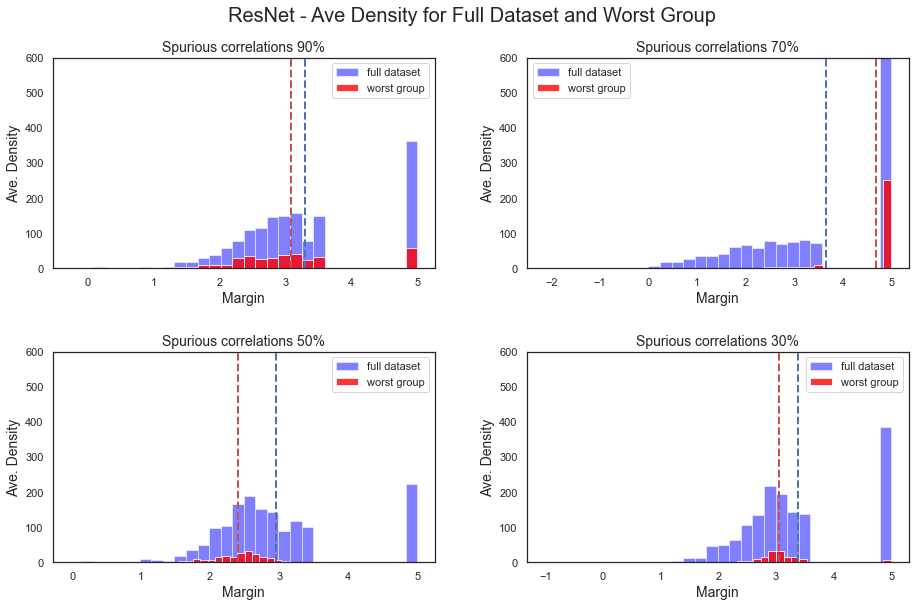

In [89]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
    # Plot margin subplots for RESNET
    model_type = 'ResNet'
    # 90% group
    resnet_9_logits = predict_9
    altered_labels_9 = X_test_9_altindices
    confidence_resnet_9 = confidence(resnet_9_logits, y_test)
    worst_group_9 = (y_test == 1.0) & (altered_labels_9 == 1.0) 

    # 70% group
    resnet_7_logits = predict_7
    altered_labels_7 = X_test_7_altindices
    confidence_resnet_7 = confidence(resnet_7_logits, y_test)
    worst_group_7 = (y_test == 1.0) & (altered_labels_7 == 1.0)

    # 50% group
    resnet_5_logits = predict_5
    altered_labels_5 = X_test_5_altindices
    confidence_resnet_5 = confidence(resnet_5_logits, y_test)
    worst_group_5 = (y_test == 1.0) & (altered_labels_5 == 1.0) 

    # 30% group
    resnet_3_logits = predict_3
    altered_labels_3 = X_test_3_altindices
    confidence_resnet_3 = confidence(resnet_3_logits, y_test)
    worst_group_3 = (y_test == 1.0) & (altered_labels_3 == 1.0)

    plot_y_max = 600
    ave_line_width = 2

    sns.set_style('white')
    fig, ax = plt.subplots(2, 2, figsize = (14, 9))
    fig.tight_layout(pad = 5)
    
    ax[0 , 0].hist(confidence_resnet_9, label = 'full dataset', bins = 30, alpha = 0.5, color = 'blue')
    ax[0 , 0].hist(np.array(confidence_resnet_9)[worst_group_9], label = 'worst group', bins = 30, alpha = 0.8, color = 'red')
    ax[0 , 0].set_title("Spurious correlations {}%".format(90), fontsize = 14)
    ax[0 , 0].set_xlabel('Margin', fontsize = 14)
    ax[0 , 0].set_ylabel('Ave. Density', fontsize = 14)
    ax[0 , 0].set_ylim([0, plot_y_max])
    ax[0 , 0].axvline(np.mean(confidence_resnet_9), color='b', linestyle='dashed', linewidth=ave_line_width)
    ax[0 , 0].axvline(np.mean(np.array(confidence_resnet_9)[worst_group_9]), color='r', linestyle='dashed', linewidth=ave_line_width)
    ax[0 , 0].legend()

    ax[0 , 1].hist(confidence_resnet_7, label = 'full dataset', bins = 30, alpha = 0.5, color = 'blue')
    ax[0 , 1].hist(np.array(confidence_resnet_7)[worst_group_7], label = 'worst group', bins = 30, alpha = 0.8, color = 'red')
    ax[0 , 1].set_title("Spurious correlations {}%".format(70), fontsize = 14)
    ax[0 , 1].set_xlabel('Margin', fontsize = 14)
    ax[0 , 1].set_ylabel('Ave. Density', fontsize = 14)
    ax[0 , 1].set_ylim([0, plot_y_max])
    ax[0 , 1].axvline(np.mean(confidence_resnet_7), color='b', linestyle='dashed', linewidth=ave_line_width)
    ax[0 , 1].axvline(np.mean(np.array(confidence_resnet_7)[worst_group_7]), color='r', linestyle='dashed', linewidth=ave_line_width)
    ax[0 , 1].legend()

    ax[1, 0].hist(confidence_resnet_5, label = 'full dataset', bins = 30, alpha = 0.5, color = 'blue')
    ax[1, 0].hist(np.array(confidence_resnet_5)[worst_group_5], label = 'worst group', bins = 30, alpha = 0.8, color = 'red')
    ax[1, 0].set_title("Spurious correlations {}%".format(50), fontsize = 14)
    ax[1, 0].set_xlabel('Margin', fontsize = 14)
    ax[1, 0].set_ylabel('Ave. Density', fontsize = 14)
    ax[1, 0].set_ylim([0, plot_y_max])
    ax[1, 0].axvline(np.mean(confidence_resnet_5), color='b', linestyle='dashed', linewidth=ave_line_width)
    ax[1, 0].axvline(np.mean(np.array(confidence_resnet_5)[worst_group_5]), color='r', linestyle='dashed', linewidth=ave_line_width)
    ax[1, 0].legend()

    ax[1, 1].hist(confidence_resnet_3, label = 'full dataset', bins = 30, alpha = 0.5, color = 'blue')
    ax[1, 1].hist(np.array(confidence_resnet_3)[worst_group_3], label = 'worst group', bins = 30, alpha = 0.8, color = 'red')
    ax[1, 1].set_title("Spurious correlations {}%".format(30), fontsize = 14)
    ax[1, 1].set_xlabel('Margin', fontsize = 14)
    ax[1, 1].set_ylabel('Ave. Density', fontsize = 14)
    ax[1, 1].set_ylim([0, plot_y_max])
    ax[1, 1].axvline(np.mean(confidence_resnet_3), color='b', linestyle='dashed', linewidth=ave_line_width)
    ax[1, 1].axvline(np.mean(np.array(confidence_resnet_3)[worst_group_3]), color='r', linestyle='dashed', linewidth=ave_line_width)
    ax[1, 1].legend()

    fig.suptitle('{} - Ave Density for Full Dataset and Worst Group'.format(model_type), fontsize=20)
    plt.show()

These plots present somewhat conflicting results. For the datasets with spurious correlations in 90%, 50%, and 30% of the digit 7 (i.e., overrepresented) data, we see that the worst group has worse performance than the full dataset on average. This aligns somewhat with the findings of Jones et al. (2021), although these differences are not as stark as the ones found in the paper. However, for the datasets with spurious correlations in 70% of the data, the worst group seems to do slightly *better* on average. 

**NOTE**: In some cases the confidence was $\inf$. For purposes of visualization, we set these values to be arbitrarily high ($\hat{c} = 5$). 

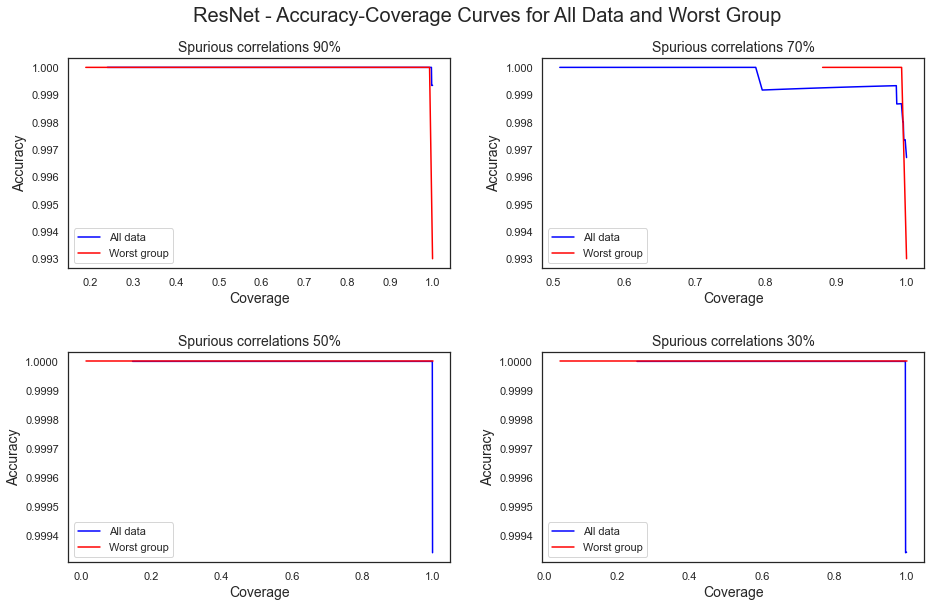

In [92]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    sns.set_style('white')
    fig, ax = plt.subplots(2, 2, figsize = (14, 9))
    fig.tight_layout(pad = 5)

    tau = np.linspace(0, 4, 100)
    full_coverage_9 = [coverage(np.array(confidence_resnet_9), t) for t in tau]
    full_accuracy_9 = [accuracy(np.array(confidence_resnet_9), t) for t in tau]
    worst_coverage_9 = [coverage(np.array(confidence_resnet_9)[worst_group], t) for t in tau]
    worst_accuracy_9 = [accuracy(np.array(confidence_resnet_9)[worst_group], t) for t in tau]
    
    full_coverage_7 = [coverage(np.array(confidence_resnet_7), t) for t in tau]
    full_accuracy_7 = [accuracy(np.array(confidence_resnet_7), t) for t in tau]
    worst_coverage_7 = [coverage(np.array(confidence_resnet_7)[worst_group], t) for t in tau]
    worst_accuracy_7 = [accuracy(np.array(confidence_resnet_7)[worst_group], t) for t in tau]
    
    full_coverage_5 = [coverage(np.array(confidence_resnet_5), t) for t in tau]
    full_accuracy_5 = [accuracy(np.array(confidence_resnet_5), t) for t in tau]
    worst_coverage_5 = [coverage(np.array(confidence_resnet_5)[worst_group], t) for t in tau]
    worst_accuracy_5 = [accuracy(np.array(confidence_resnet_5)[worst_group], t) for t in tau]

    full_coverage_3 = [coverage(np.array(confidence_resnet_3), t) for t in tau]
    full_accuracy_3 = [accuracy(np.array(confidence_resnet_3), t) for t in tau]
    worst_coverage_3 = [coverage(np.array(confidence_resnet_3)[worst_group], t) for t in tau]
    worst_accuracy_3 = [accuracy(np.array(confidence_resnet_3)[worst_group], t) for t in tau]

    ax[0,0].plot(full_coverage_9, full_accuracy_9, label = 'All data', color = 'blue')
    ax[0,0].plot(worst_coverage_9, worst_accuracy_9, label = 'Worst group', color = 'red')
    ax[0,0].set_xlabel('Coverage', fontsize = 14)
    ax[0,0].set_ylabel('Accuracy', fontsize = 14)
    ax[0,0].set_title("Spurious correlations {}%".format(90), fontsize = 14)
    ax[0,0].legend()
    
    ax[0,1].plot(full_coverage_7, full_accuracy_7, label = 'All data', color = 'blue')
    ax[0,1].plot(worst_coverage_7, worst_accuracy_7, label = 'Worst group', color = 'red')
    ax[0,1].set_xlabel('Coverage', fontsize = 14)
    ax[0,1].set_ylabel('Accuracy', fontsize = 14)
    ax[0,1].set_title("Spurious correlations {}%".format(70), fontsize = 14)
    ax[0,1].legend()
    
    ax[1,0].plot(full_coverage_5, full_accuracy_5, label = 'All data', color = 'blue')
    ax[1,0].plot(worst_coverage_5, worst_accuracy_5, label = 'Worst group', color = 'red')
    ax[1,0].set_xlabel('Coverage', fontsize = 14)
    ax[1,0].set_ylabel('Accuracy', fontsize = 14)
    ax[1,0].set_title("Spurious correlations {}%".format(50), fontsize = 14)
    ax[1,0].legend()
    
    ax[1,1].plot(full_coverage_3, full_accuracy_3, label = 'All data', color = 'blue')
    ax[1,1].plot(worst_coverage_3, worst_accuracy_3, label = 'Worst group', color = 'red')
    ax[1,1].set_xlabel('Coverage', fontsize = 14)
    ax[1,1].set_ylabel('Accuracy', fontsize = 14)
    ax[1,1].set_title("Spurious correlations {}%".format(30), fontsize = 14)
    ax[1,1].legend()
    
    fig.suptitle('{} - Accuracy-Coverage Curves for All Data and Worst Group'.format(model_type), fontsize=20)
    plt.show()

These plots provide similar information to the margin distributions above, such that there does not seem to be a consistent, meaningful difference between the full data and the worst group regarding the relationship between coverage and accuracy. While the findings from Jones and colleagues (2021) would suggest that accuracy for the worst group should decrease at lower coverage, we see that this is not the case - but rather that the worst group accuracy is very high (almost at ceiling) for low coverage. This seems to suggest that model training was *too* good such that it potentially was not affected by the spurious features added. Therefore, we investigate findings when using a simpler Keras model below. 

## 6b. Results for Keras Model

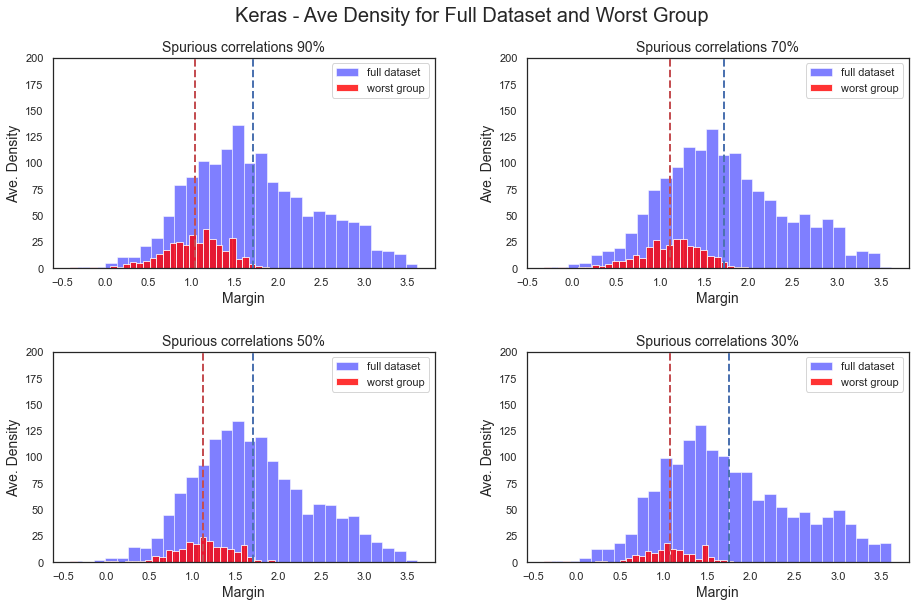

In [85]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
    # Plot margin subplots for RESNET
    model_type = 'Keras'
    # 90% group
    keras_9_logits =  np.hstack((1.0 - predict_nn_9, predict_nn_9))
    altered_labels_9 = X_test_9_altindices
    confidence_keras_9 = confidence(keras_9_logits, y_test)

    # 70% group
    keras_7_logits =  np.hstack((1.0 - predict_nn_7, predict_nn_7) )
    altered_labels_7 = X_test_7_altindices
    confidence_keras_7 = confidence(keras_7_logits, y_test)

    # 50% group
    keras_5_logits =  np.hstack((1.0 - predict_nn_5, predict_nn_5) )
    altered_labels_5 = X_test_5_altindices
    confidence_keras_5 = confidence(keras_5_logits, y_test)

    # 30% group
    keras_3_logits =  np.hstack((1.0 - predict_nn_3, predict_nn_3) )
    altered_labels_3 = X_test_3_altindices
    confidence_keras_3 = confidence(keras_3_logits, y_test)

    plot_y_max = 200
    ave_line_width = 2

    sns.set_style('white')
    fig, ax = plt.subplots(2, 2, figsize = (14, 9))
    fig.tight_layout(pad = 5)
    ax[0 , 0].hist(confidence_keras_9, label = 'full dataset', bins = 30, alpha = 0.5, color = 'blue')
    ax[0 , 0].hist(np.array(confidence_keras_9)[worst_group_9], label = 'worst group', bins = 30, alpha = 0.8, color = 'red')
    ax[0 , 0].set_title("Spurious correlations {}%".format(90), fontsize = 14)
    ax[0 , 0].set_xlabel('Margin', fontsize = 14)
    ax[0 , 0].set_ylabel('Ave. Density', fontsize = 14)
    ax[0 , 0].set_ylim([0, plot_y_max])
    ax[0 , 0].axvline(np.mean(confidence_keras_9), color='b', linestyle='dashed', linewidth=ave_line_width)
    ax[0 , 0].axvline(np.mean(np.array(confidence_keras_9)[worst_group_9]), color='r', linestyle='dashed', linewidth=ave_line_width)
    ax[0 , 0].legend()

    ax[0 , 1].hist(confidence_keras_7, label = 'full dataset', bins = 30, alpha = 0.5, color = 'blue')
    ax[0 , 1].hist(np.array(confidence_keras_7)[worst_group_7], label = 'worst group', bins = 30, alpha = 0.8, color = 'red')
    ax[0 , 1].set_title("Spurious correlations {}%".format(70), fontsize = 14)
    ax[0 , 1].set_xlabel('Margin', fontsize = 14)
    ax[0 , 1].set_ylabel('Ave. Density', fontsize = 14)
    ax[0 , 1].set_ylim([0, plot_y_max])
    ax[0 , 1].axvline(np.mean(confidence_keras_7), color='b', linestyle='dashed', linewidth=ave_line_width)
    ax[0 , 1].axvline(np.mean(np.array(confidence_keras_7)[worst_group_7]), color='r', linestyle='dashed', linewidth=ave_line_width)
    ax[0 , 1].legend()

    ax[1, 0].hist(confidence_keras_5, label = 'full dataset', bins = 30, alpha = 0.5, color = 'blue')
    ax[1, 0].hist(np.array(confidence_keras_5)[worst_group_5], label = 'worst group', bins = 30, alpha = 0.8, color = 'red')
    ax[1, 0].set_title("Spurious correlations {}%".format(50), fontsize = 14)
    ax[1, 0].set_xlabel('Margin', fontsize = 14)
    ax[1, 0].set_ylabel('Ave. Density', fontsize = 14)
    ax[1, 0].set_ylim([0, plot_y_max])
    ax[1, 0].axvline(np.mean(confidence_keras_5), color='b', linestyle='dashed', linewidth=ave_line_width)
    ax[1, 0].axvline(np.mean(np.array(confidence_keras_5)[worst_group_5]), color='r', linestyle='dashed', linewidth=ave_line_width)
    ax[1, 0].legend()

    ax[1, 1].hist(confidence_keras_3, label = 'full dataset', bins = 30, alpha = 0.5, color = 'blue')
    ax[1, 1].hist(np.array(confidence_keras_3)[worst_group_3], label = 'worst group', bins = 30, alpha = 0.8, color = 'red')
    ax[1, 1].set_title("Spurious correlations {}%".format(30), fontsize = 14)
    ax[1, 1].set_xlabel('Margin', fontsize = 14)
    ax[1, 1].set_ylabel('Ave. Density', fontsize = 14)
    ax[1, 1].set_ylim([0, plot_y_max])
    ax[1, 1].axvline(np.mean(confidence_keras_3), color='b', linestyle='dashed', linewidth=ave_line_width)
    ax[1, 1].axvline(np.mean(np.array(confidence_keras_3)[worst_group_3]), color='r', linestyle='dashed', linewidth=ave_line_width)
    ax[1, 1].legend()

    fig.suptitle('{} - Ave Density for Full Dataset and Worst Group'.format(model_type), fontsize=20)
    plt.show()

These plots present results that are more in line with the findings from Jones et al. (2021), such that the worst group has consistently worse performance than the average group. Of note, however, these models do not seem to be making many incorrect predictions - rather, the worst group predictions are simply less confident than the full dataset. It seems that the accuracy is close to ceiling for these models. 

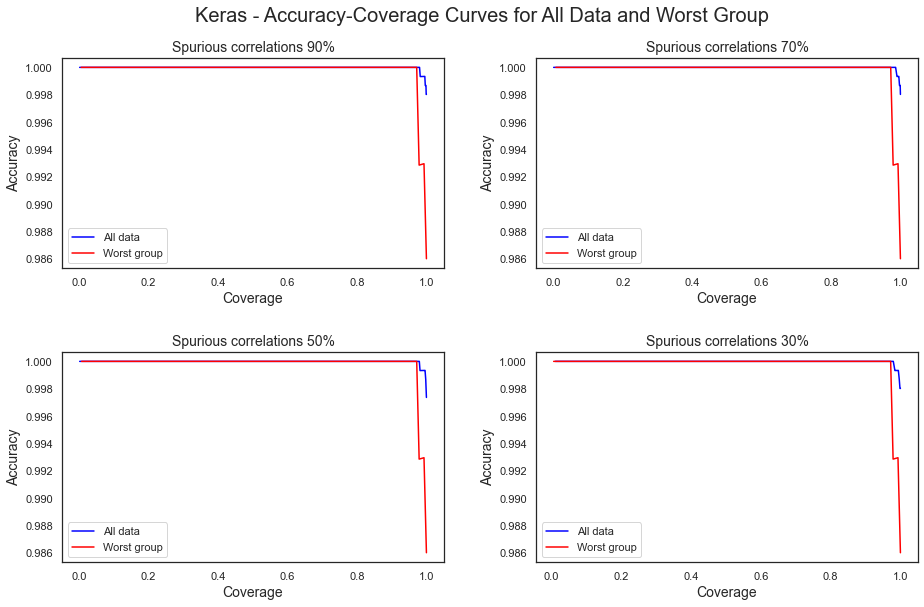

In [94]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    sns.set_style('white')
    fig, ax = plt.subplots(2, 2, figsize = (14, 9))
    fig.tight_layout(pad = 5)

    tau = np.linspace(0, 4, 100)
    full_coverage_9 = [coverage(np.array(confidence_keras_9), t) for t in tau]
    full_accuracy_9 = [accuracy(np.array(confidence_keras_9), t) for t in tau]
    worst_coverage_9 = [coverage(np.array(confidence_keras_9)[worst_group], t) for t in tau]
    worst_accuracy_9 = [accuracy(np.array(confidence_keras_9)[worst_group], t) for t in tau]
    
    full_coverage_7 = [coverage(np.array(confidence_keras_7), t) for t in tau]
    full_accuracy_7 = [accuracy(np.array(confidence_keras_7), t) for t in tau]
    worst_coverage_7 = [coverage(np.array(confidence_keras_7)[worst_group], t) for t in tau]
    worst_accuracy_7 = [accuracy(np.array(confidence_keras_7)[worst_group], t) for t in tau]
    
    full_coverage_5 = [coverage(np.array(confidence_keras_5), t) for t in tau]
    full_accuracy_5 = [accuracy(np.array(confidence_keras_5), t) for t in tau]
    worst_coverage_5 = [coverage(np.array(confidence_keras_5)[worst_group], t) for t in tau]
    worst_accuracy_5 = [accuracy(np.array(confidence_keras_5)[worst_group], t) for t in tau]

    full_coverage_3 = [coverage(np.array(confidence_keras_3), t) for t in tau]
    full_accuracy_3 = [accuracy(np.array(confidence_keras_3), t) for t in tau]
    worst_coverage_3 = [coverage(np.array(confidence_keras_3)[worst_group], t) for t in tau]
    worst_accuracy_3 = [accuracy(np.array(confidence_keras_3)[worst_group], t) for t in tau]

    ax[0,0].plot(full_coverage_9, full_accuracy_9, label = 'All data', color = 'blue')
    ax[0,0].plot(worst_coverage_9, worst_accuracy_9, label = 'Worst group', color = 'red')
    ax[0,0].set_xlabel('Coverage', fontsize = 14)
    ax[0,0].set_ylabel('Accuracy', fontsize = 14)
    ax[0,0].set_title("Spurious correlations {}%".format(90), fontsize = 14)
    ax[0,0].legend()
    
    ax[0,1].plot(full_coverage_7, full_accuracy_7, label = 'All data', color = 'blue')
    ax[0,1].plot(worst_coverage_7, worst_accuracy_7, label = 'Worst group', color = 'red')
    ax[0,1].set_xlabel('Coverage', fontsize = 14)
    ax[0,1].set_ylabel('Accuracy', fontsize = 14)
    ax[0,1].set_title("Spurious correlations {}%".format(70), fontsize = 14)
    ax[0,1].legend()
    
    ax[1,0].plot(full_coverage_5, full_accuracy_5, label = 'All data', color = 'blue')
    ax[1,0].plot(worst_coverage_5, worst_accuracy_5, label = 'Worst group', color = 'red')
    ax[1,0].set_xlabel('Coverage', fontsize = 14)
    ax[1,0].set_ylabel('Accuracy', fontsize = 14)
    ax[1,0].set_title("Spurious correlations {}%".format(50), fontsize = 14)
    ax[1,0].legend()
    
    ax[1,1].plot(full_coverage_3, full_accuracy_3, label = 'All data', color = 'blue')
    ax[1,1].plot(worst_coverage_3, worst_accuracy_3, label = 'Worst group', color = 'red')
    ax[1,1].set_xlabel('Coverage', fontsize = 14)
    ax[1,1].set_ylabel('Accuracy', fontsize = 14)
    ax[1,1].set_title("Spurious correlations {}%".format(30), fontsize = 14)
    ax[1,1].legend()
    
    fig.suptitle('Keras - Accuracy-Coverage Curves for All Data and Worst Group', fontsize=20)
    plt.show()

The first thing to note on these plots is the y-axis, which does not even dip below 0.98. Therefore, our suspicion that these models are at ceiling seems to be accurate, such that regardless of coverage, the full dataset and worst group seem to be predicted nearly perfectly. It is possible that our synthetic data was not complex enough to lead to inaccurate classifications, even with this simple model. 

## 7. Conclusions, Discussion, and Broader Impacts 

In this paper, the authors claim that the results suggest that selective classification should be used with care and underscore the importance of training models to perform equally well across groups at full coverage. However, it seems that the results may rely on the dataset being particularly prone to spurious correlations and it is not clear that this phenomena is concerning across all domains that consider using selective classification. 

Consider our toy datasets and the addition of black boxes that are essentially meaningless in the context of the classification task. Whether or not an image contains an artificially added black box is not related to the number written in the image. In addition to developing better selective classification techniques that reduce group disparities at full coverage, it also seems natural to consider addressing problematic characteristics of the dataset. If there are in fact spurious correlations present in a given dataset, how meaningful are the correlations? In our toy example, we could simply remove the black boxes in order to avoid the contrasting result. This makes us wonder if there is a more naïve approach where practitioners better examine dataset characteristics before applying methodologies like selective classification in order to avoid these types of issues altogether.

In our implementation, neither the ResNet nor the Keras models fully reproduced the problems identified by Jones and colleagues (2021). While the Keras models did seem to produce results that were more *consistent* with results from the paper, we were limited by a near-total absense of incorrect classifications. Of note, we purposely chose the digits 1 vs. 7 to increase "difficulty" of the problem (i.e., out of all the 10 digits, the digits 1 and 7 seem most similar to each other visually). However, this did not seem to cause problems with accurately classifying the digits, even with a simpler Keras model. 

Finally, in the original paper, it is worth noting that none of the datasets seem particularly relevant to real-world application where bias and disparities are highly impactful (e.g., healthcare, predictive policing, criminal justice). The "worst group" is not underrepresented in the sense that individuals belonging to these groups experience social injustices, but rather in the sense that there are fewer examples of observations in this group (e.g., blond men being the "worst group" in `CelebA` dataset). While the framing of the paper encourages consideration of how selective classification can worsen group disparities, and this was demonstrated in various datasets, this finding would be much more compelling if it were applied in a dataset with meaningful real-world use cases. This would be an important future direction to inform building classification models in risk-adverse settings. 